In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import PrecisionRecallDisplay
from itertools import cycle

In [17]:
# import data as dataframe
df_test = pd.read_csv(
    "/data/dssg/occrp/data/output/document_classifier/EfficientNetB4_2022_08_16-11_34_48/assessment/test_predictions.csv",
    sep=",",
)
df_test

,bank-statements,company-registry,contracts,court-documents,gazettes,invoices,passport-scan,receipts,shipping-receipts,true-label,predicted,path
0,0.000582,0.003205,0.089773,0.012740,0.004198,0.008309,0.002430,0.999764,0.001013,receipts,receipts,/data/processed_clean/receipts/50484041.36cbf4...
1,0.004372,0.010358,0.019922,0.004247,0.004065,0.004978,0.999930,0.001903,0.001089,passport-scan,passport-scan,/data/processed_clean/passport-scan/4e7737d529...
2,0.034008,0.022297,0.019416,0.006140,0.005105,0.001536,0.006595,0.999688,0.000829,receipts,receipts,/data/processed_clean/receipts/49845039.e9c0ed...
3,0.001326,0.003737,0.326604,0.008207,0.003310,0.004432,0.001246,0.000275,0.999662,shipping-receipts,shipping-receipts,/data/processed_clean/shipping-receipts/1a4e2b...
4,0.063275,0.000964,0.017476,0.001789,0.003186,0.998112,0.004492,0.001191,0.007317,invoices,invoices,/data/processed_clean/invoices/7891219fe5c495b...
...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.999970,0.003495,0.002121,0.001177,0.013217,0.000094,0.003804,0.000905,0.000973,bank-statements,bank-statements,/data/processed_clean/bank-statements/59239922...
241,0.002634,0.005394,0.005479,0.003863,1.000000,0.006039,0.008818,0.002303,0.001739,gazettes,gazettes,/data/processed_clean/gazettes/44502775.44ab9b...
242,0.002959,0.999950,0.013206,0.000507,0.003167,0.002670,0.001341,0.003744,0.002771,company-registry,company-registry,/data/processed_clean/company-registry/5047858...
243,0.029304,0.005952,0.004998,0.030756,0.006758,0.015851,0.999632,0.002882,0.008155,passport-scan,passport-scan,/data/processed_clean/passport-scan/3718700af3...


In [18]:
# calcualte different classes
df_test["true-label"].nunique()

9

In [19]:
# rename column
df_test.rename(columns={"true-label": "true"}, inplace=True)

In [21]:
df_test["true"].value_counts()
# df_test["predicted"].value_counts()

receipts             30
passport-scan        30
shipping-receipts    30
invoices             30
gazettes             30
bank-statements      30
company-registry     30
contracts            19
court-documents      16
Name: true, dtype: int64

In [22]:
# transfrom true labels to one hot encoded
true_labels = pd.get_dummies(df_test.true)
# print(true_labels.head())
true_labels = LabelBinarizer().fit_transform(df_test.true)
true_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# transform predicted values to array
columns = df_test.columns[:-2]
print(columns)
predict_labels = df_test[
    [
        "bank-statements",
        "company-registry",
        "contracts",
        "court-documents",
        "gazettes",
        "invoices",
        "passport-scan",
        "receipts",
        "shipping-receipts",
    ]
].to_numpy()

predict_labels

Index(['bank-statements', 'company-registry', 'contracts', 'court-documents',
       'gazettes', 'invoices', 'passport-scan', 'receipts',
       'shipping-receipts', 'true'],
      dtype='object')


array([[5.8230720e-04, 3.2047322e-03, 8.9773210e-02, ..., 2.4302271e-03,
        9.9976414e-01, 1.0129899e-03],
       [4.3723340e-03, 1.0358343e-02, 1.9921688e-02, ..., 9.9992967e-01,
        1.9033581e-03, 1.0892397e-03],
       [3.4007963e-02, 2.2297446e-02, 1.9416174e-02, ..., 6.5947804e-03,
        9.9968815e-01, 8.2890363e-04],
       ...,
       [2.9593120e-03, 9.9994960e-01, 1.3206133e-02, ..., 1.3409569e-03,
        3.7437095e-03, 2.7709007e-03],
       [2.9303856e-02, 5.9518614e-03, 4.9983417e-03, ..., 9.9963210e-01,
        2.8818222e-03, 8.1549870e-03],
       [2.9185251e-03, 2.7298588e-02, 1.6211614e-02, ..., 6.4948540e-03,
        1.4621683e-04, 9.8930470e-03]])

In [24]:
len(true_labels)

245

In [25]:
len(predict_labels)

245

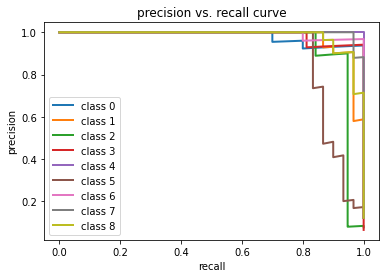

In [26]:
# plain precision recall curve
n_classes = 9
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predict_labels[:, i])
    plt.plot(recall[i], precision[i], lw=2, label="class {}".format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [27]:
# calculate precision recall for each class and also joined
n_classes = 9
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predict_labels[:, i])
    average_precision[i] = average_precision_score(true_labels[:, i], predict_labels[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(true_labels.ravel(), predict_labels.ravel())
average_precision["micro"] = average_precision_score(true_labels, predict_labels, average="micro")

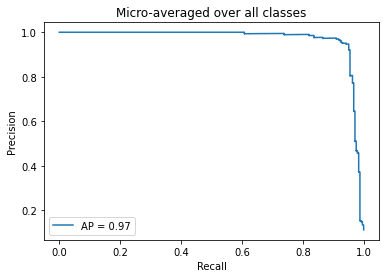

In [28]:
# plot aggreaged plot

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)

display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

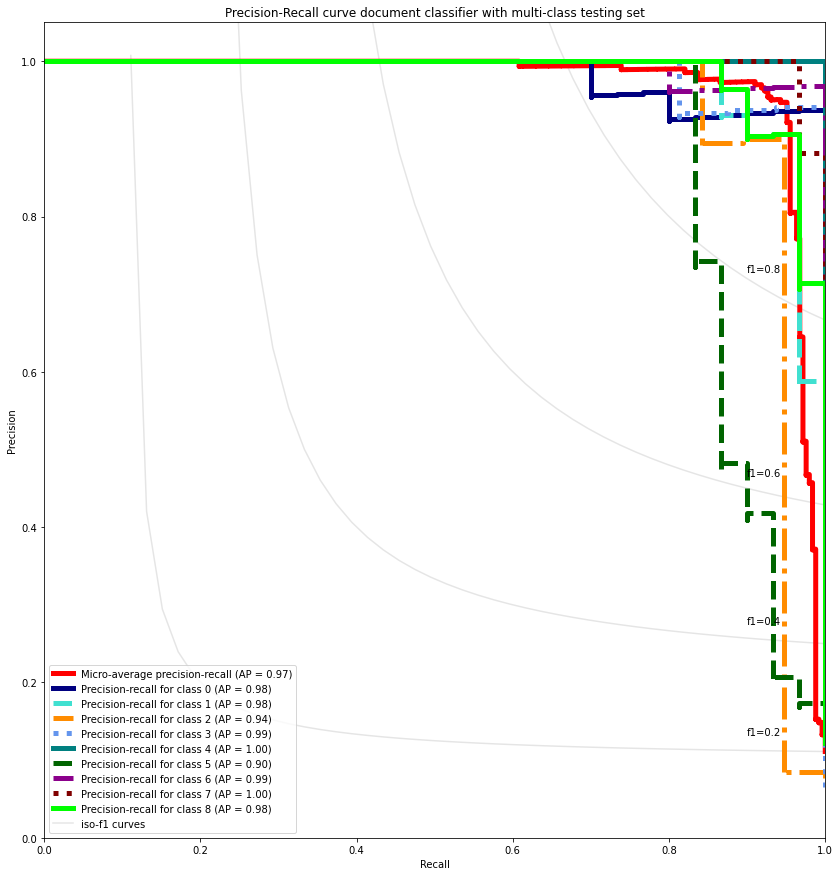

In [29]:
# plot graph with more information
n_classes = 9
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "darkgreen", "darkmagenta", "maroon", "lime"])
shape_list = ["-", "--", "-.", ":"]
linestyle = cycle(shape_list)

_, ax = plt.subplots(figsize=(14, 15))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="red", linewidth=5)

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color, linestyle=linestyle.__next__(), linewidth=5)


# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="lower left")
ax.set_title("Precision-Recall curve document classifier with multi-class testing set")


plt.show()

In [ ]:
#################
# Create precision recall curves individually
#################

In [ ]:
# create all individual  dataframe
df_gazette = df_test.copy()
df_passport = df_test.copy()
df_shipping_receipt = df_test.copy()
df_receipts = df_test.copy()
df_company_registry = df_test.copy()
df_invoices = df_test.copy()
df_bank_statement = df_test.copy()
df_contract = df_test.copy()
df_court_documents = df_test.copy()

In [ ]:
# transform gazettes true to 1 and everythin else to 0
df_gazette.true = df_gazette.true.map(
    {
        "gazettes": 1,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)
# transform gazettes predicted to 1 and everythin else to 0
df_gazette.predicted = df_gazette.predicted.map(
    {
        "gazettes": 1,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform passport true to 1 and everythin else to 0
df_passport.true = df_passport.true.map(
    {
        "gazettes": 0,
        "passport-scan": 1,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)
# transform passport predicted to 1 and everythin else to 0
df_passport.predicted = df_passport.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 1,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform shipping receipt to 1 and everythin else to 0
df_shipping_receipt.true = df_shipping_receipt.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 1,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_shipping_receipt.predicted = df_shipping_receipt.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 1,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform receipt to 1 and everythin else to 0
df_receipts.true = df_receipts.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 1,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_receipts.predicted = df_receipts.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 1,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform company registry to 1 and everythin else to 0
df_company_registry.true = df_company_registry.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 1,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_company_registry.predicted = df_company_registry.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 1,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform invoices to 1 and everythin else to 0
df_invoices.true = df_invoices.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 1,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_invoices.predicted = df_invoices.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 1,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform bank statements to 1 and everythin else to 0
df_bank_statement.true = df_bank_statement.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 1,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_bank_statement.predicted = df_bank_statement.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 1,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform contracts to 1 and everythin else to 0
df_contract.true = df_contract.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 1,
        "court-documents": 0,
    }
)

df_contract.predicted = df_contract.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 1,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform court documents to 1 and everythin else to 0
df_court_documents.true = df_court_documents.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 1,
    }
)

df_court_documents.predicted = df_court_documents.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 1,
        "other": 0,
    }
)

In [ ]:
# calculate precision recall
precision_gazette, recall_gazette, thresholds_gazette = precision_recall_curve(df_gazette.true, df_gazette.predicted)

precision_passport, recall_passport, thresholds_passport = precision_recall_curve(df_passport.true, df_passport.predicted)

precision_shipping, recall_shipping, thresholds_shipping = precision_recall_curve(
    df_shipping_receipt.true, df_shipping_receipt.predicted
)

precision_receipts, recall_receipts, thresholds_receipts = precision_recall_curve(df_receipts.true, df_receipts.predicted)

precision_company_registry, recall_company_registry, thresholds_company_registry = precision_recall_curve(
    df_company_registry.true, df_company_registry.predicted
)

precision_invoice, recall_invoice, thresholds_invoice = precision_recall_curve(df_invoices.true, df_invoices.predicted)

precision_bank, recall_bank, thresholds_bank = precision_recall_curve(df_bank_statement.true, df_bank_statement.predicted)

precision_contract, recall_contract, thresholds_contract = precision_recall_curve(df_contract.true, df_contract.predicted)

precision_court, recall_court, thresholds_court = precision_recall_curve(
    df_court_documents.true, df_court_documents.predicted
)

In [ ]:
# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_gazette, precision_gazette, color="purple")
ax.plot(recall_passport, precision_passport, color="red")
ax.plot(recall_shipping, precision_shipping, color="blue")
ax.plot(recall_receipts, precision_receipts, color="yellow")
ax.plot(recall_company_registry, precision_company_registry, color="orange")
ax.plot(recall_invoice, precision_invoice, color="green")
ax.plot(recall_bank, precision_bank, color="gray")
ax.plot(recall_contract, precision_contract, color="black")
ax.plot(recall_court, precision_court, color="pink")
# add axis labels to plot
ax.set_title("Precision-Recall Curve")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")

# display plot
plt.show()